# Traffic Violations in Montgomery County

## Section - A

Step 1: Download the complete data from https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q

Step 2: Load all the data (1 or more files) into Pandas using the appropriate format.

Step 3: Using Matplotlib plot the data accordingly.
   
        1. Plot a histogram for Violation Type
        2. Filter the "Violation Type" for the period 2013 to 2015
        3. Plot the aggregated Number of Violations first by District followed by Race (Refer to Stacked Bar Charts)

## Section - B

Study the data with you and **in consultation with your mentor**, create a series of plots to justify an analysis of a proposed story.  

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [16]:
traffic_violation = pd.read_csv('Traffic_Violations.csv')

In [17]:
type(traffic_violation)

pandas.core.frame.DataFrame

## Data Exploration

In [18]:
traffic_violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844721 entries, 0 to 844720
Data columns (total 35 columns):
Date Of Stop               844721 non-null object
Time Of Stop               844721 non-null object
Agency                     844721 non-null object
SubAgency                  844721 non-null object
Description                844716 non-null object
Location                   844719 non-null object
Latitude                   771434 non-null float64
Longitude                  771434 non-null float64
Accident                   844721 non-null object
Belts                      844721 non-null object
Personal Injury            844721 non-null object
Property Damage            844721 non-null object
Fatal                      844721 non-null object
Commercial License         844721 non-null object
HAZMAT                     844721 non-null object
Commercial Vehicle         844721 non-null object
Alcohol                    844721 non-null object
Work Zone                  844721 non

In [19]:
traffic_violation.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/30/2014,23:51:00,MCP,"1st district, Rockville",DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,NaN,NaN,No,No,...,21-202(h1),Transportation Article,No,BLACK,M,ROCKVILLE,MD,MD,A - Marked Patrol,NaN
1,03/31/2015,23:59:00,MCP,"2nd district, Bethesda",HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,NaN,NaN,No,No,...,55*,NaN,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
2,09/30/2014,23:30:00,MCP,"5th district, Germantown",FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,NaN,NaN,No,No,...,22-226(a),Transportation Article,No,BLACK,F,GERMANTOWN,MD,MD,A - Marked Patrol,NaN
3,03/31/2015,23:59:00,MCP,"5th district, Germantown",DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,39.033823,-77.075440,No,No,...,21-707(a),Transportation Article,No,WHITE,F,KENSINGTON,MD,MD,A - Marked Patrol,"(39.0338233333333, -77.07544)"
4,03/31/2015,23:58:00,MCP,"2nd district, Bethesda",STOP LIGHTS (*),2355 NB AT BATTERY LN,38.991627,-77.095805,No,No,...,64*,NaN,No,OTHER,M,ROCKVILLE,MD,MD,A - Marked Patrol,"(38.9916266666667, -77.095805)"


In [6]:
## Can't see all the columns let's see what's max col is set to
pd.get_option('display.max_columns')

20

## Since the max columns is 20.  Let's increase the number from 20 to 35

In [20]:
## Display Max Columns is less than the number of columns present in the DataFrame 
pd.set_option('display.max_columns', 35)

In [21]:
traffic_violation.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/30/2014,23:51:00,MCP,"1st district, Rockville",DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2014.0,FORD,MUSTANG,BLACK,Citation,21-202(h1),Transportation Article,No,BLACK,M,ROCKVILLE,MD,MD,A - Marked Patrol,NaN
1,03/31/2015,23:59:00,MCP,"2nd district, Bethesda",HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2003.0,HONDA,2S,BLUE,ESERO,55*,NaN,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,NaN
2,09/30/2014,23:30:00,MCP,"5th district, Germantown",FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2009.0,TOYOTA,CAMRY,RED,Warning,22-226(a),Transportation Article,No,BLACK,F,GERMANTOWN,MD,MD,A - Marked Patrol,NaN
3,03/31/2015,23:59:00,MCP,"5th district, Germantown",DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,39.033823,-77.075440,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2007.0,ACURA,MDX,BLACK,Warning,21-707(a),Transportation Article,No,WHITE,F,KENSINGTON,MD,MD,A - Marked Patrol,"(39.0338233333333, -77.07544)"
4,03/31/2015,23:58:00,MCP,"2nd district, Bethesda",STOP LIGHTS (*),2355 NB AT BATTERY LN,38.991627,-77.095805,No,No,No,No,No,Yes,No,No,No,No,MD,02 - Automobile,2003.0,NISSAN,MURANO,SILVER,ESERO,64*,NaN,No,OTHER,M,ROCKVILLE,MD,MD,A - Marked Patrol,"(38.9916266666667, -77.095805)"


## Most traffic violation citations are done by ?

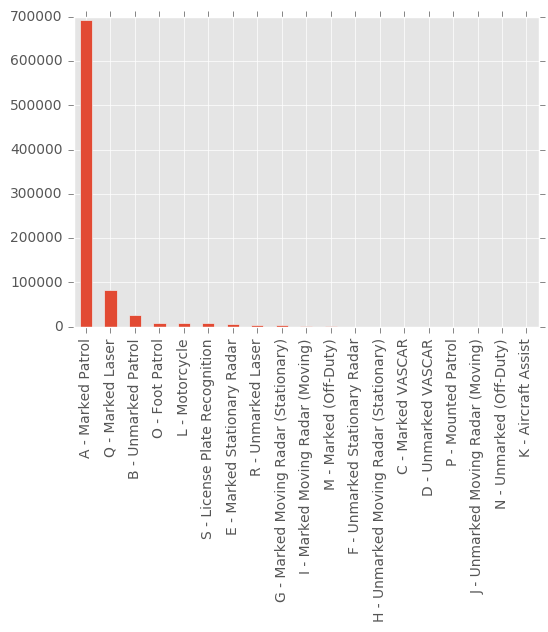

In [22]:
traffic_violation['Arrest Type'].value_counts().plot(kind='bar')
# Seems that marked patrol still make large amount of citations.

## Which SubAgency reported maximum Traffic Violations

In [23]:
traffic_violation['SubAgency'].value_counts()

4th district, Wheaton                              208158
3rd district, Silver Spring                        177715
2nd district, Bethesda                             122740
6th district, Gaithersburg / Montgomery Village    108764
5th district, Germantown                            98026
1st district, Rockville                             96877
Headquarters and Special Operations                 32441
Name: SubAgency, dtype: int64

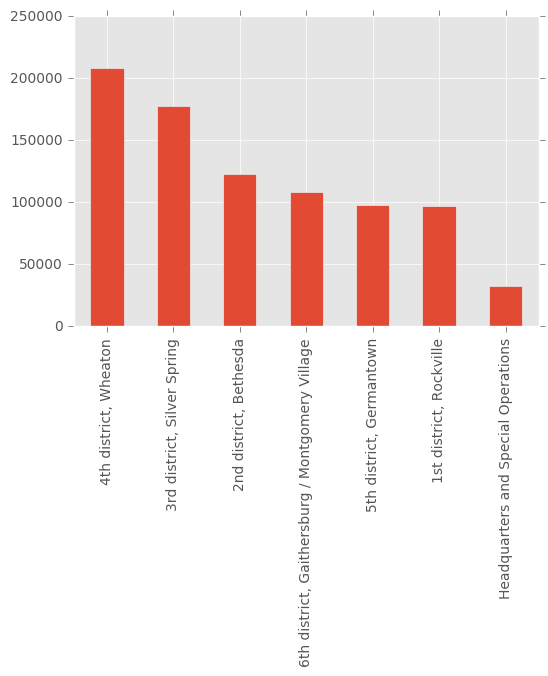

In [24]:
## Let's plot the SubAgency which reported highest Traffic Violations
traffic_violation['SubAgency'].value_counts().plot(kind='bar')

## Report the TrafficViolations by Year. Did the Traffic Violations increased over last year?

In [31]:
## Let's check the type of the 'Date Of Stop' column 
traffic_violation.dtypes

Date Of Stop               datetime64[ns]
Time Of Stop                       object
Agency                             object
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                           object
Belts                              object
Personal Injury                    object
Property Damage                    object
Fatal                              object
Commercial License                 object
HAZMAT                             object
Commercial Vehicle                 object
Alcohol                            object
Work Zone                          object
State                              object
VehicleType                        object
Year                              float64
Make                               object
Model                              object
Color                             

In [27]:
# Converting the type of Date of stop to datetime object
traffic_violation['Date Of Stop'] = pd.to_datetime(traffic_violation['Date Of Stop'])

In [28]:
## Let's check if it got changed
traffic_violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844721 entries, 0 to 844720
Data columns (total 35 columns):
Date Of Stop               844721 non-null datetime64[ns]
Time Of Stop               844721 non-null object
Agency                     844721 non-null object
SubAgency                  844721 non-null object
Description                844716 non-null object
Location                   844719 non-null object
Latitude                   771434 non-null float64
Longitude                  771434 non-null float64
Accident                   844721 non-null object
Belts                      844721 non-null object
Personal Injury            844721 non-null object
Property Damage            844721 non-null object
Fatal                      844721 non-null object
Commercial License         844721 non-null object
HAZMAT                     844721 non-null object
Commercial Vehicle         844721 non-null object
Alcohol                    844721 non-null object
Work Zone                  84

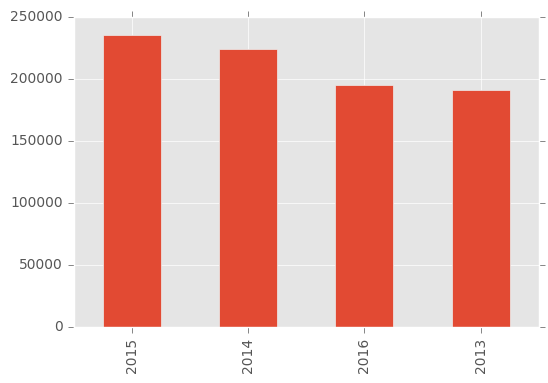

In [32]:

traffic_violation['Date Of Stop'].dt.year.value_counts().plot(kind='bar')

## What kind of traffic violations are more frequent

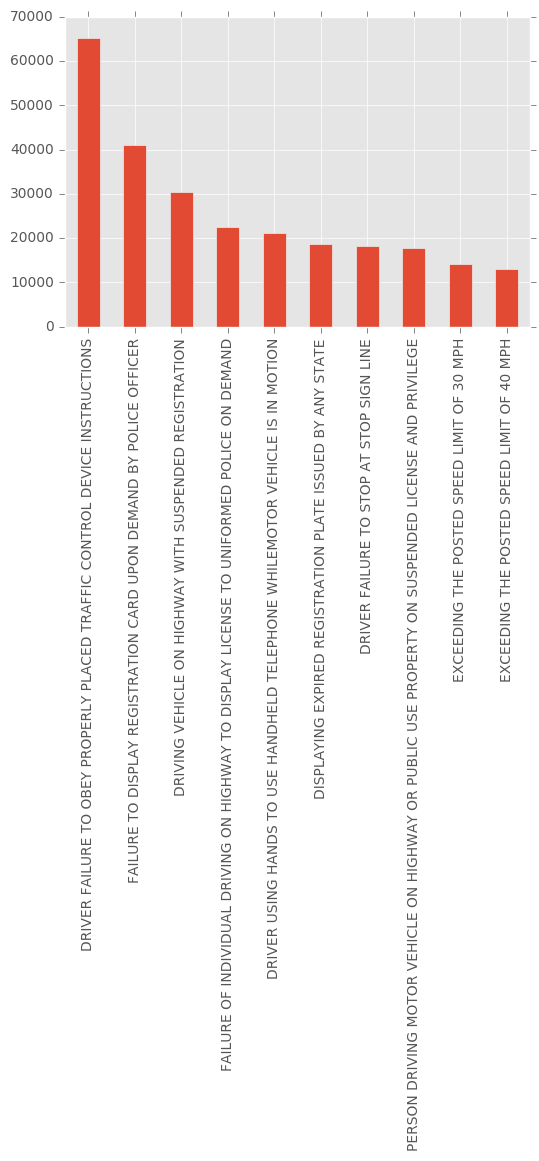

In [51]:
traffic_violation['Description'].value_counts()[:10].plot(kind='bar')

## At what time are the cops most active

In [16]:
traffic_violation['Time Of Stop']

0         23:51:00
1         23:59:00
2         23:30:00
3         23:59:00
4         23:58:00
5         23:58:00
6         23:58:00
7         23:58:00
8         23:58:00
9         23:58:00
10        23:58:00
11        23:58:00
12        22:58:00
13        22:58:00
14        22:46:00
15        23:57:00
16        23:56:00
17        23:53:00
18        23:53:00
19        22:32:00
20        23:53:00
21        23:52:00
22        23:50:00
23        23:48:00
24        23:48:00
25        23:45:00
26        23:45:00
27        23:45:00
28        21:47:00
29        21:47:00
            ...   
844691    08:32:00
844692    08:42:00
844693    08:53:00
844694    08:56:00
844695    11:30:00
844696    14:43:00
844697    08:25:00
844698    22:10:00
844699    10:07:00
844700    16:48:00
844701    16:32:00
844702    18:41:00
844703    21:14:00
844704    21:35:00
844705    21:44:00
844706    22:06:00
844707    23:15:00
844708    23:22:00
844709    10:00:00
844710    12:35:00
844711    13:43:00
844712    09

In [37]:
## The Time Of Stop is an object so will convert the object into DateTime
traffic_violation['Time Of Stop'] = pd.to_datetime(traffic_violation['Time Of Stop'])

In [38]:
traffic_violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844721 entries, 0 to 844720
Data columns (total 35 columns):
Date Of Stop               844721 non-null datetime64[ns]
Time Of Stop               844721 non-null datetime64[ns]
Agency                     844721 non-null object
SubAgency                  844721 non-null object
Description                844716 non-null object
Location                   844719 non-null object
Latitude                   771434 non-null float64
Longitude                  771434 non-null float64
Accident                   844721 non-null object
Belts                      844721 non-null object
Personal Injury            844721 non-null object
Property Damage            844721 non-null object
Fatal                      844721 non-null object
Commercial License         844721 non-null object
HAZMAT                     844721 non-null object
Commercial Vehicle         844721 non-null object
Alcohol                    844721 non-null object
Work Zone            

In [39]:
## Let's group the Traffic Violations by the hour of time
traffic_violation['Time Of Stop'][0]

Timestamp('2016-12-13 23:51:00')

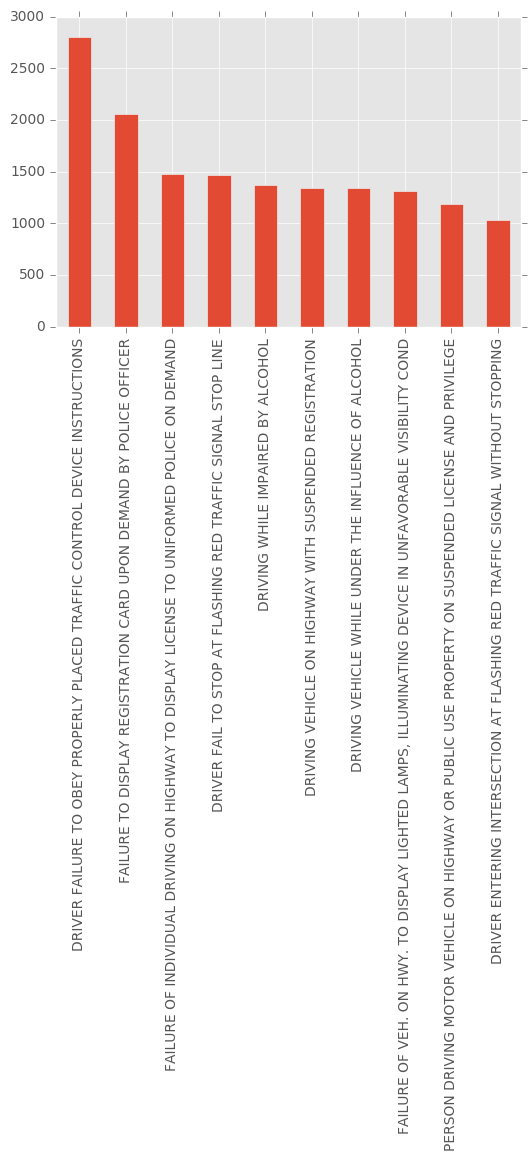

In [43]:
## What kind of violations are more frequent during midnight
traffic_violation[traffic_violation['Time Of Stop'].dt.hour == 0]['Description'].value_counts()[:10].plot(kind='bar')

In [45]:
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [ ]:
keys = traffic_violation['Date Of Stop'].dt.weekday.

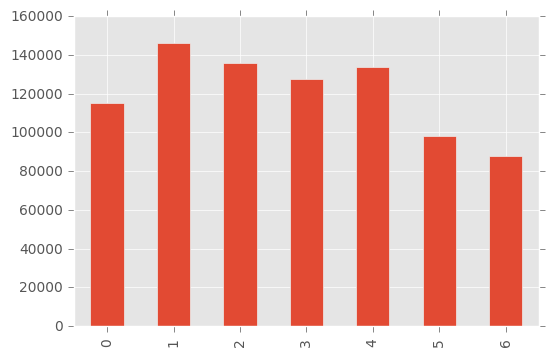

In [49]:
## Is the traffic violation during weekdays greater than that during weekends.
traffic_violation['Date Of Stop'].dt.weekday.value_counts().sort_index().plot(kind='bar')

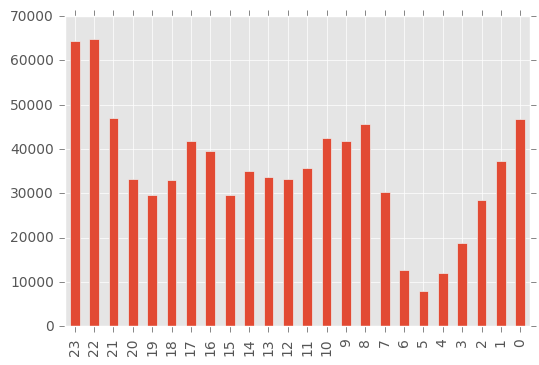

In [50]:
traffic_violation['Time Of Stop'].dt.hour.value_counts().sort_index(ascending=False).plot(kind='bar')

## Distribution of Races across Districts

In [34]:
traffic_violations_grouped_by_location_race = traffic_violation.groupby(['SubAgency','Race'])

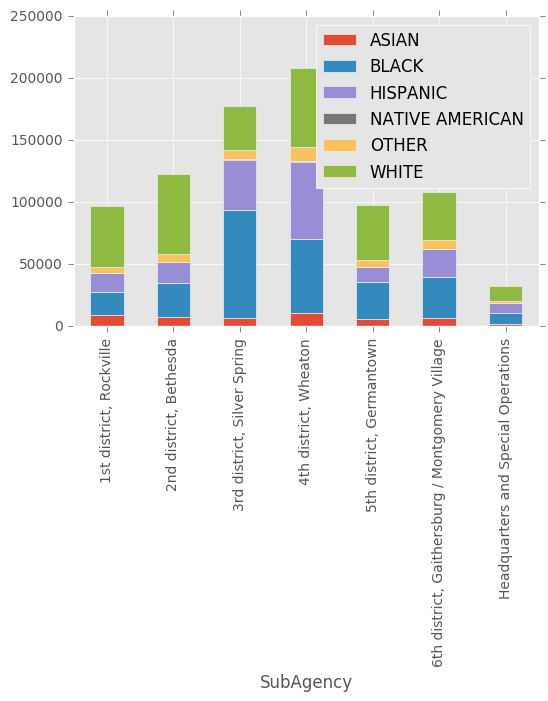

In [35]:
traffic_violations_grouped_by_location_race['Race'].count().unstack('Race').plot(kind='bar', stacked=True).legend().draggable()

## Type of Violation by Location

In [ ]:
traffic_violation.groupby(['Location', 'Description'])['Description'].count().unstack('Description').plot()